In [27]:
from google.colab import drive
drive.mount("/content/gdrive")  
%cd "/content/gdrive/MyDrive/InteligenciaArtificial_CienciaDatos/Reto2Seminario"

from fractgaussian import FDGF
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import convolve2d
from scipy.ndimage import convolve as imfilter
from skimage.color import rgb2gray
import numpy as np
from skimage.transform import rescale

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/InteligenciaArtificial_CienciaDatos/Reto2Seminario


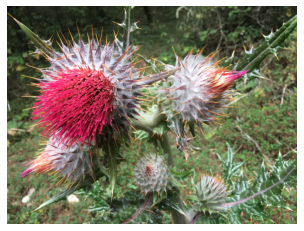

In [28]:
image1 = plt.imread("flor.JPG")
plt.imshow(image1)
plt.axis('Off')
plt.show()

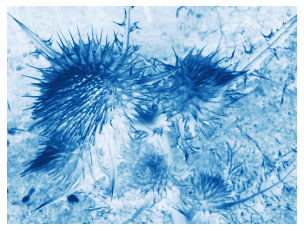

In [37]:
imageB = plt.imread("flor.JPG")[:,:,2]
plt.imshow(image1, cmap='Blues')
plt.axis('Off')
plt.show()

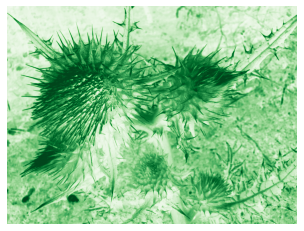

In [38]:
imageG = plt.imread("flor.JPG")[:,:,1]
plt.imshow(image1, cmap='Greens')
plt.axis('Off')
plt.show()

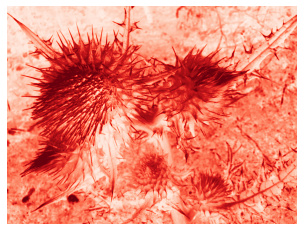

In [39]:
imageR = plt.imread("flor.JPG")[:,:,0]
plt.imshow(image1, cmap='Reds')
plt.axis('Off')
plt.show()

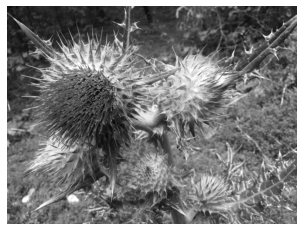

In [6]:
image2 = rgb2gray(image1)
plt.imshow(image2, cmap="gray")
plt.axis('Off')
plt.show()

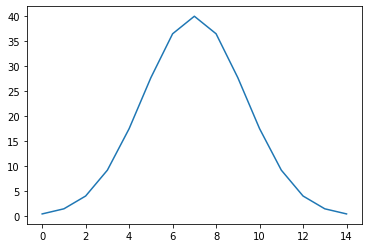

In [14]:
nu_val = 0.99
filter = FDGF(nu_val).DG
plt.plot(filter)
plt.show()

In [9]:
def fract_filtering(image, nu):
    if np.floor(nu) == 0:
        fract_filter = FDGF(nu).DG
        im_x = convolve2d(image, fract_filter, "same")
        im_y = convolve2d(image, fract_filter.T, "same")
        im_f = np.sqrt(im_x ** 2 + im_y ** 2)
    elif np.floor(nu) == 1:
        filter_base = FDGF(nu)
        DG_x = np.tile(filter_base.DG.T, (filter_base.DG.shape[0], 1))
        fract_filter = DG_x * filter_base.dG0x.T + \
            DG_x.T * filter_base.dG0x
        im_f = imfilter(image, fract_filter)
        im_f = im_f / sum(im_f)

    return 255 * (im_f - np.min(im_f)) / (np.max(im_f) - np.min(im_f))


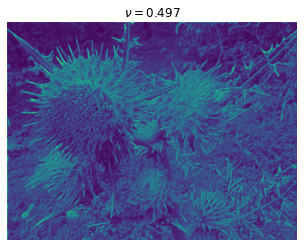

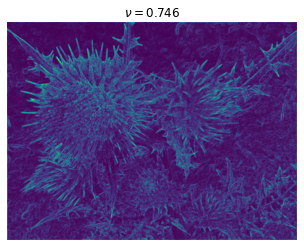

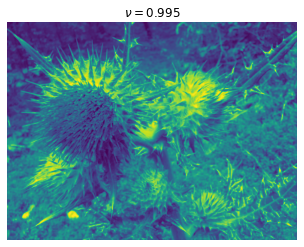

In [40]:
#image3 = np.empty(image1.shape)

#nu = 1.29

#for z in range(3):
#    image3[:,:,z] = fract_filtering(np.reshape(image1[:,:,z], (image1.shape[0], image1.shape[1])), nu)

nu_vals = [0.497, 0.746, 0.995]

for nu in nu_vals:
    image3 = fract_filtering(image2, nu)
    image3 = rescale(image3, 0.12)

    plt.imshow(image3)
    plt.title(f"$\\nu={nu}$")
    plt.axis('Off')
    plt.show()

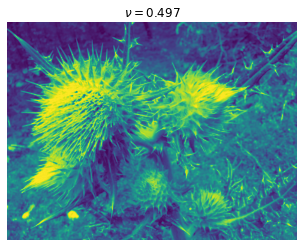

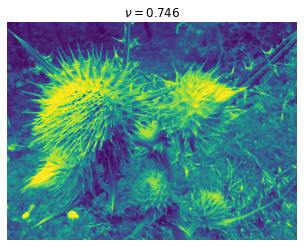

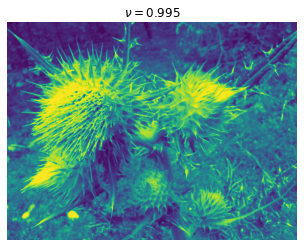

In [41]:
nu_vals = [0.497, 0.746, 0.995]

for nu in nu_vals:
    finalImageR = fract_filtering(imageR, nu)
    finalImageR = rescale(imageR, 0.12)

    plt.imshow(finalImageR)
    plt.title(f"$\\nu={nu}$")
    plt.axis('Off')
    plt.show()

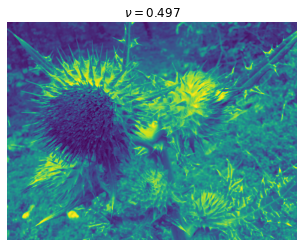

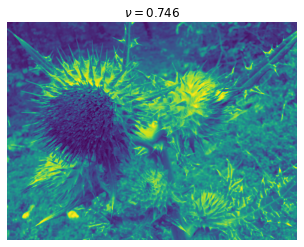

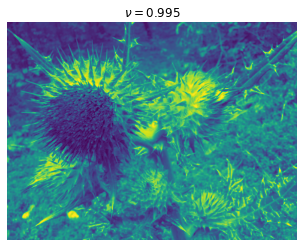

In [43]:
nu_vals = [0.497, 0.746, 0.995]

for nu in nu_vals:
    finalImageG = fract_filtering(imageG, nu)
    finalImageG = rescale(imageG, 0.12)

    plt.imshow(finalImageG)
    plt.title(f"$\\nu={nu}$")
    plt.axis('Off')
    plt.show()

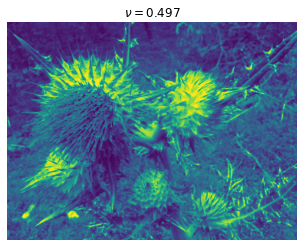

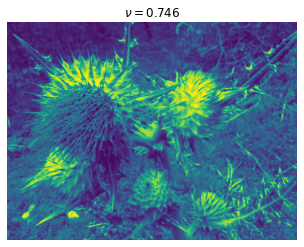

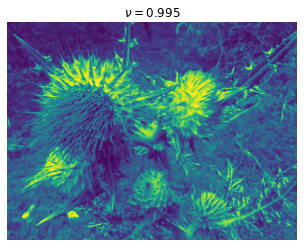

In [44]:
nu_vals = [0.497, 0.746, 0.995]

for nu in nu_vals:
    finalImageB = fract_filtering(imageB, nu)
    finalImageB = rescale(imageB, 0.12)

    plt.imshow(finalImageB)
    plt.title(f"$\\nu={nu}$")
    plt.axis('Off')
    plt.show()